<div style="background: url(background.jpeg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Prediktivno Bankarstvo</h1>


In [83]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from collections import Counter
from itertools import pairwise
from imblearn.combine import SMOTEENN

In [25]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [9]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [10]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


In [11]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

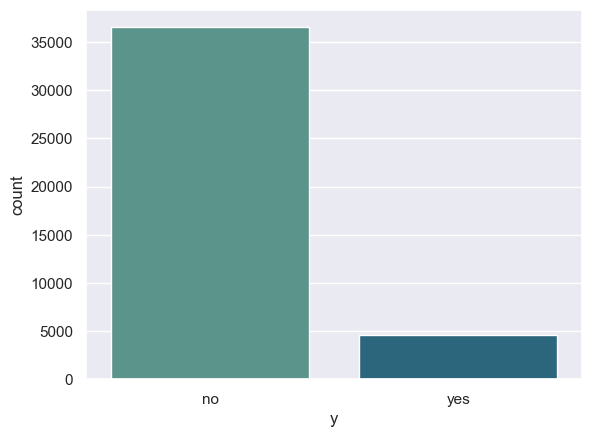

In [31]:
fig, ax = plt.subplots()

sns.countplot(x='y', data=df,
              palette=sns.color_palette("crest", 2))

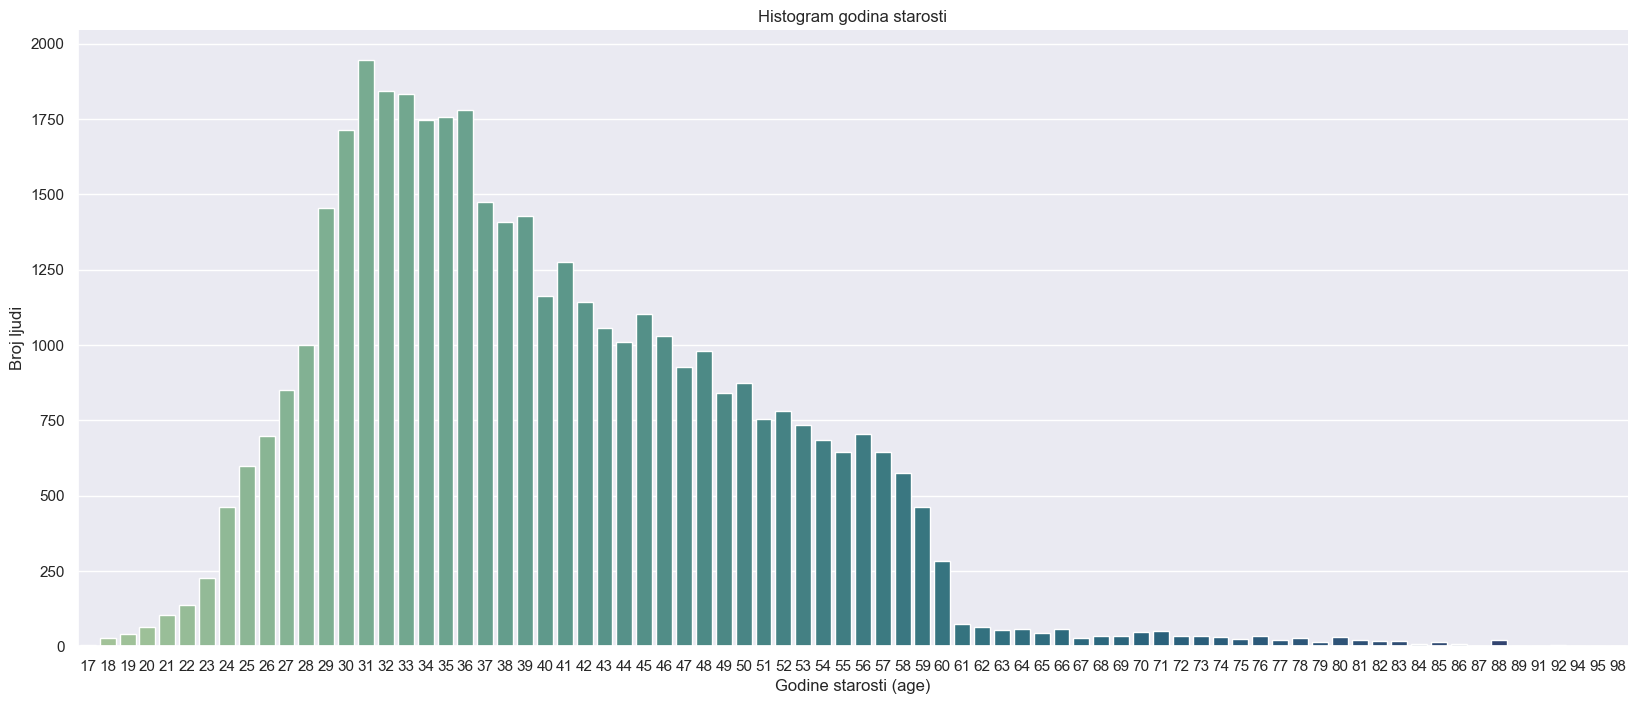

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

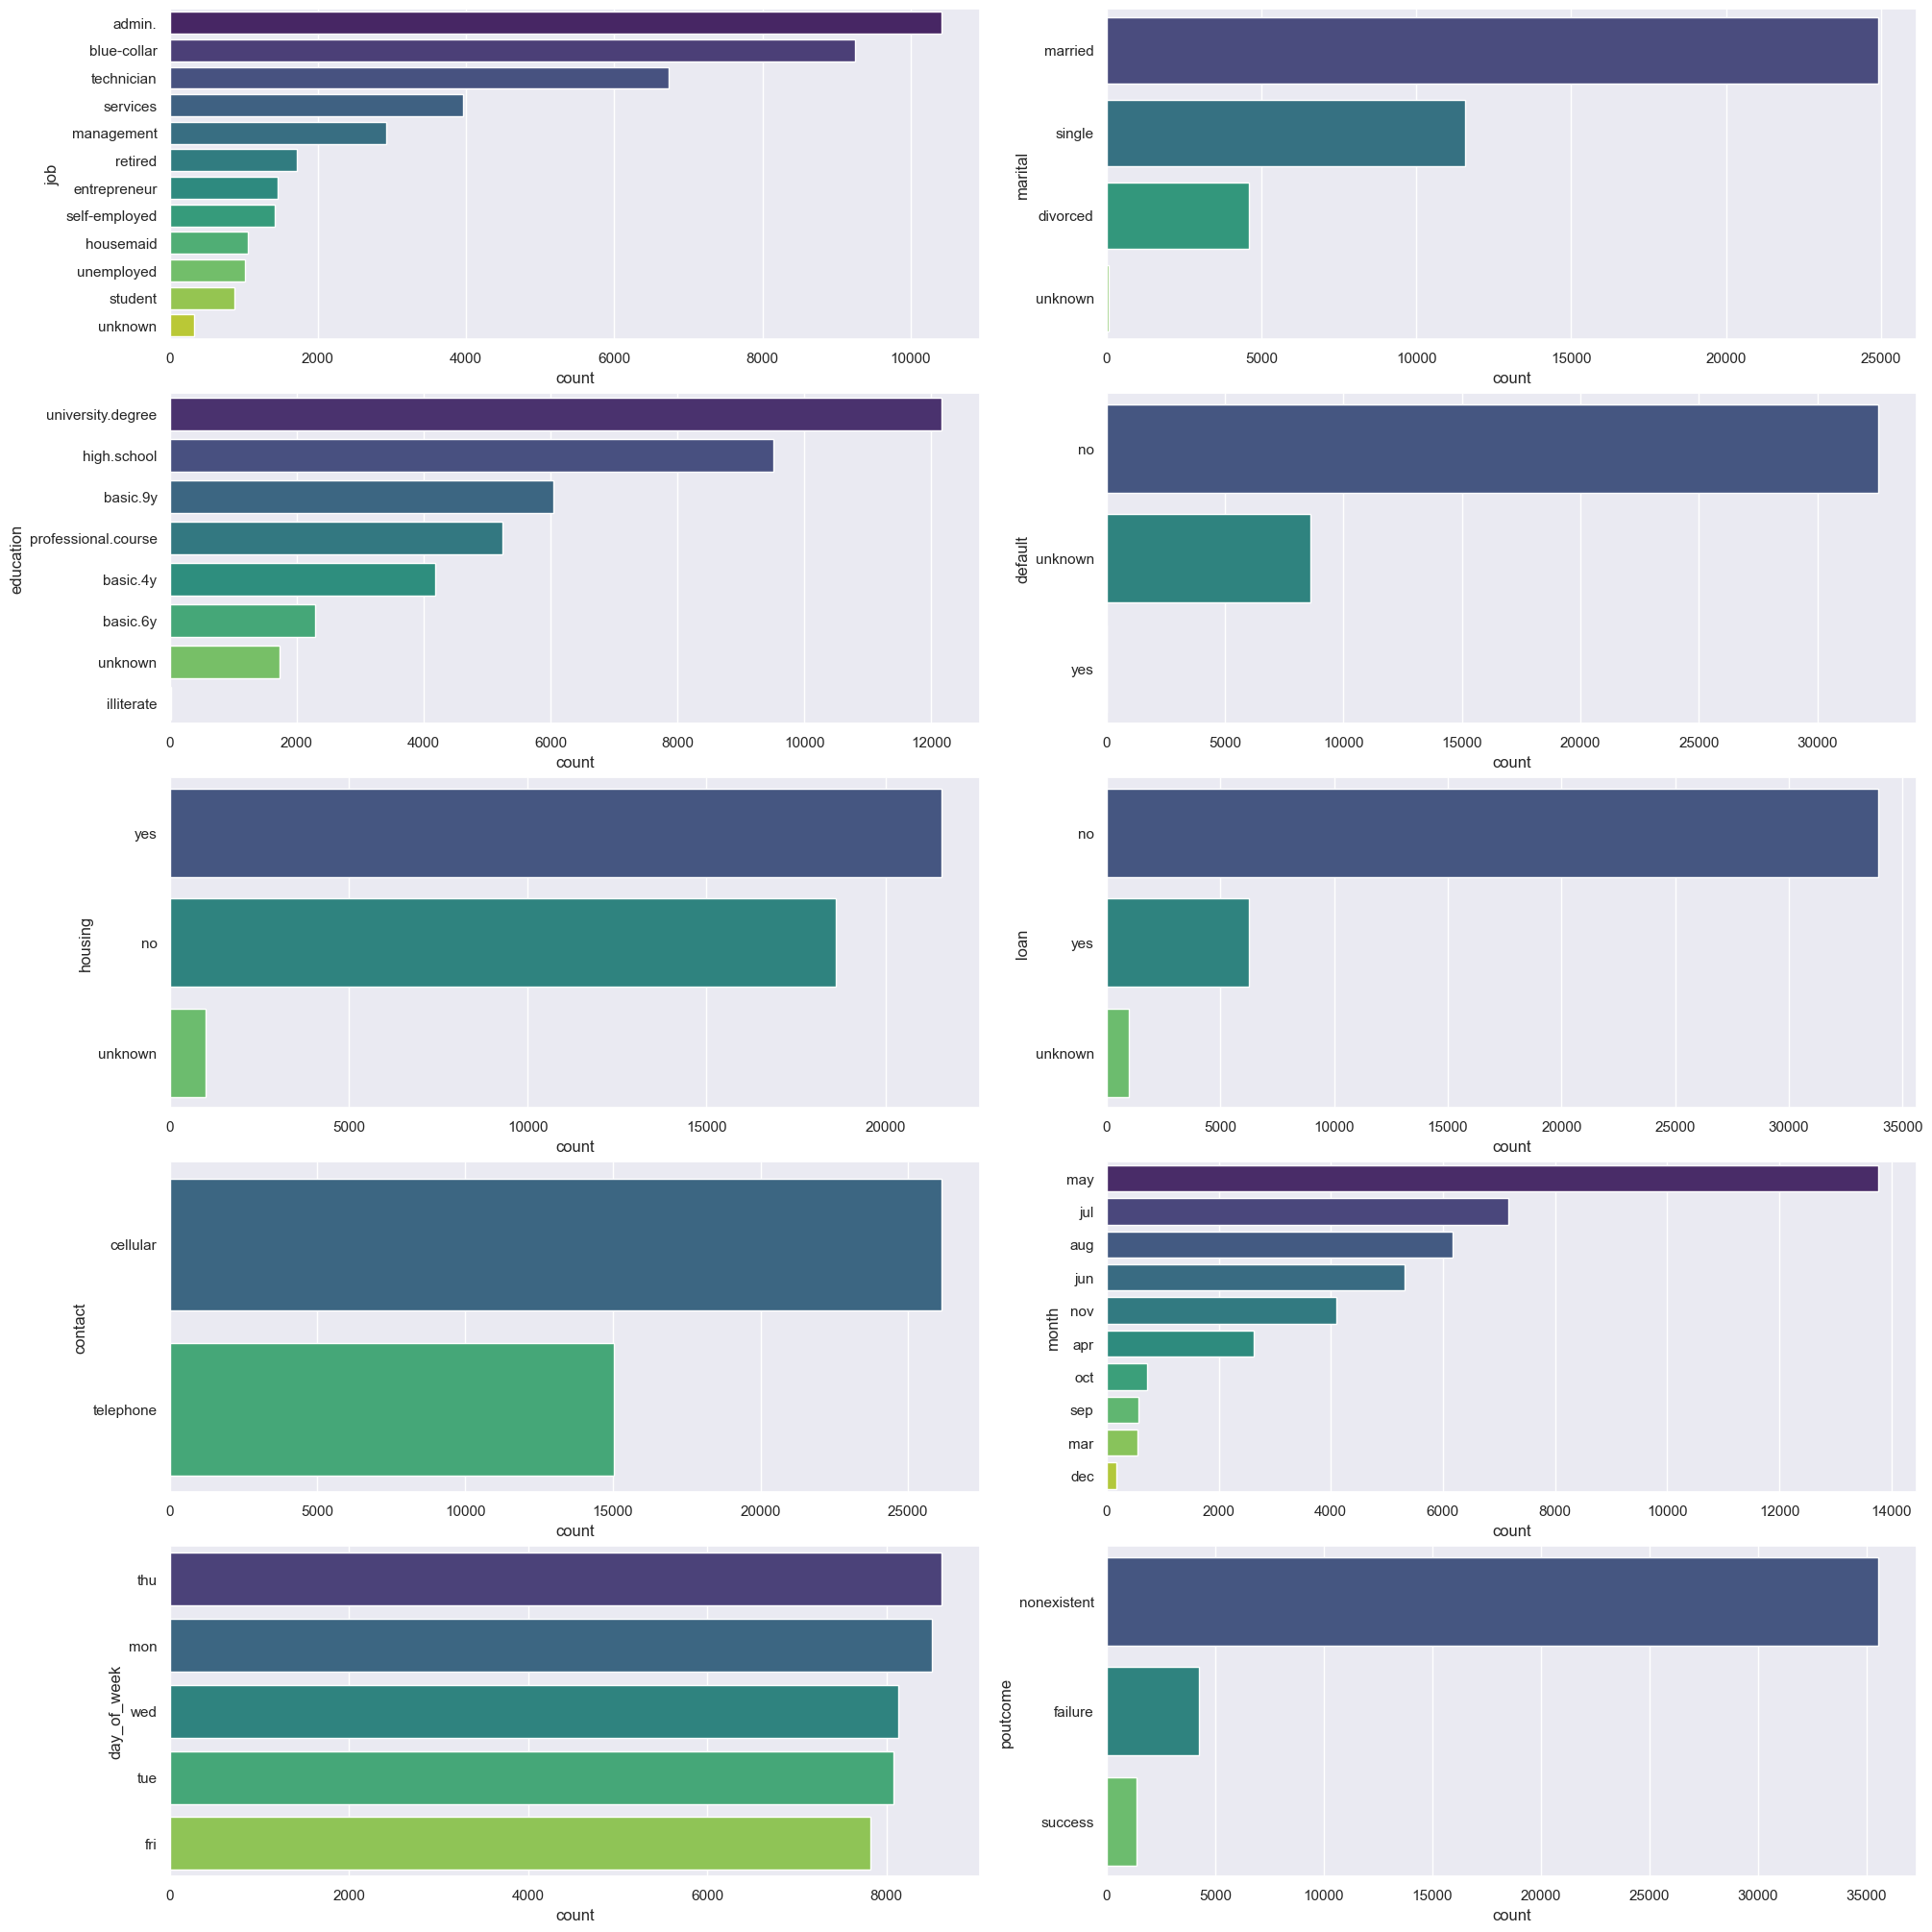

In [33]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

In [46]:
print("Unknown education", df[df['education'] == 'illiterate'].shape)
print("Default yes", df[df['default'] == 'yes'].shape)

Unknown education (18, 21)
Default yes (3, 21)


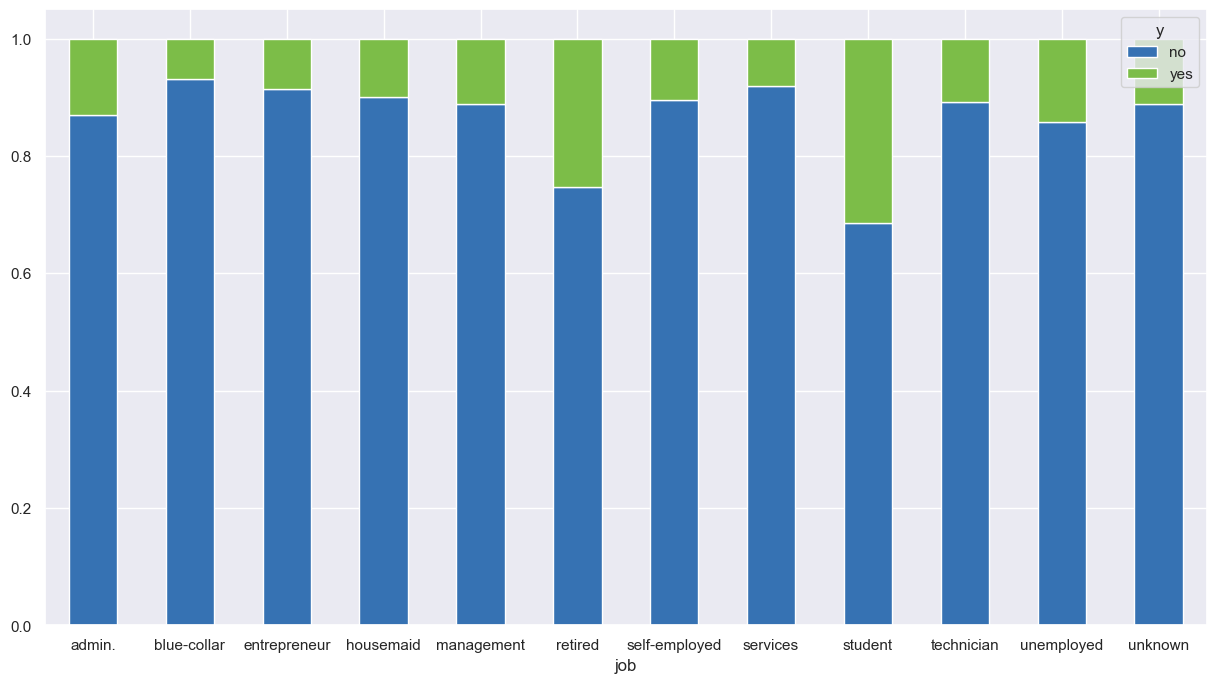

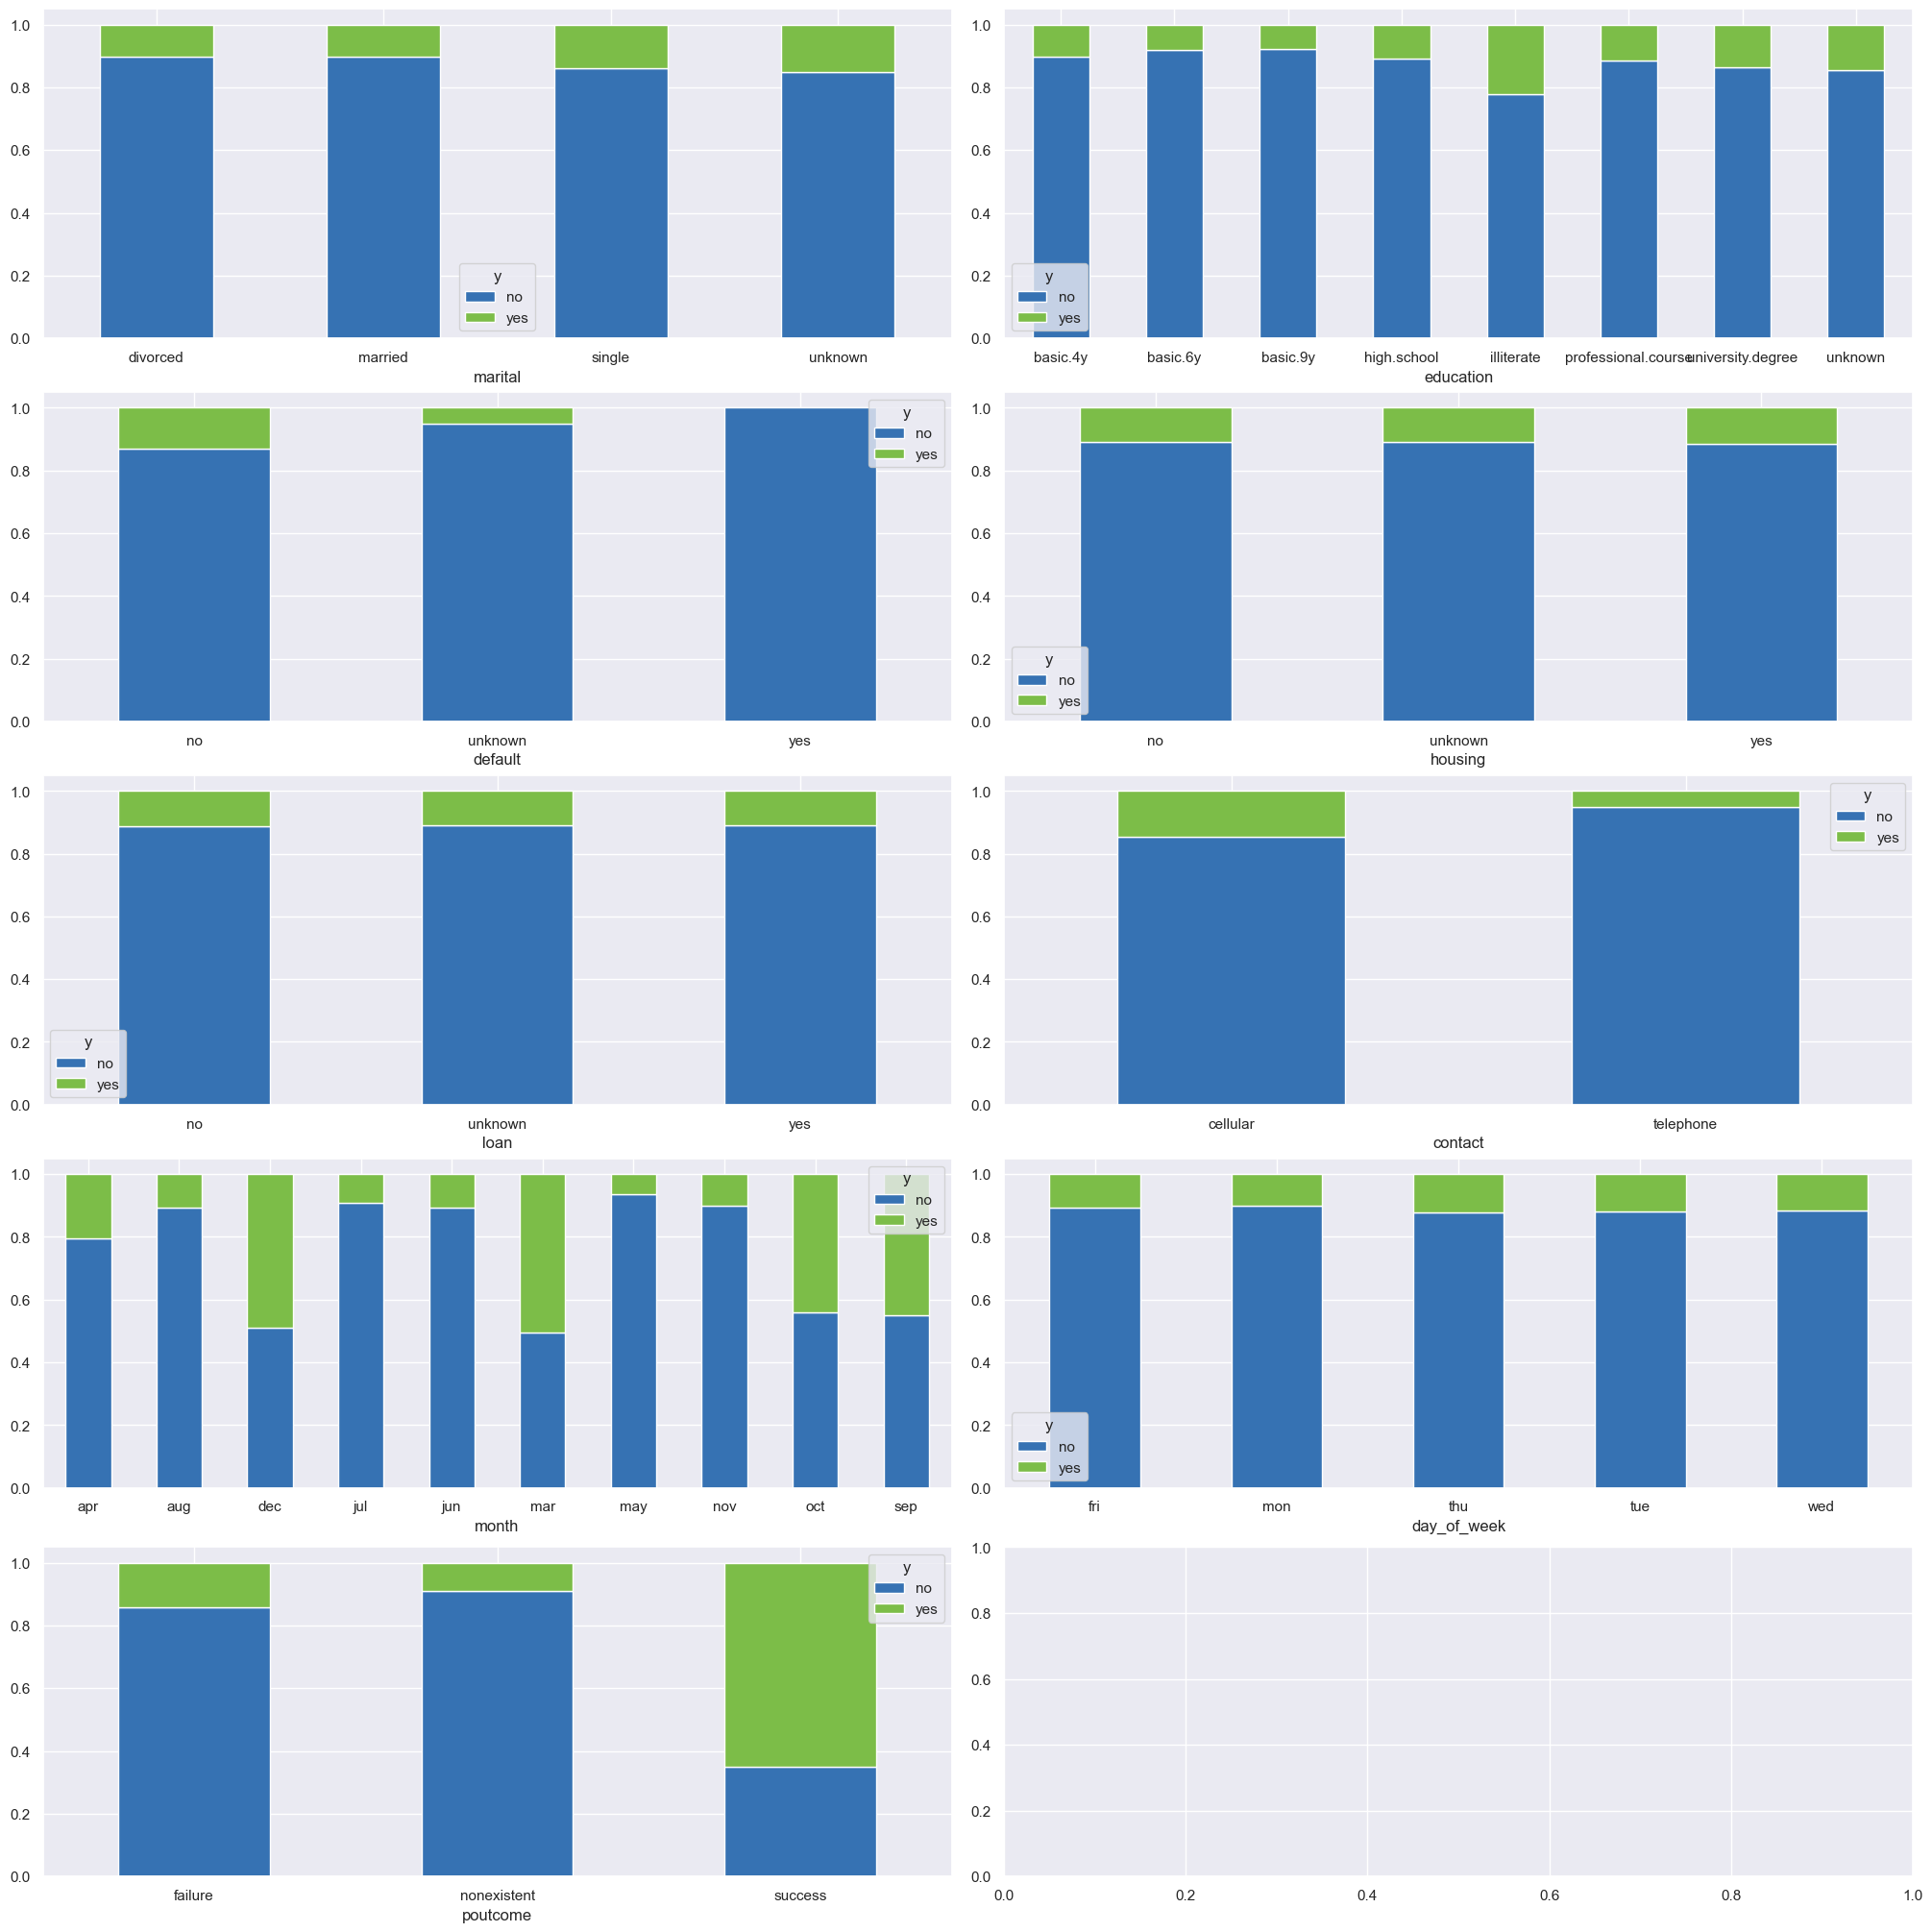

In [43]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8),
                     color=['#3672b3', '#7cbd48'])
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0,
                         color=['#3672b3', '#7cbd48'])
plt.show()

## Šta raditi sa kategoričkim podacima?

1. **job**
    - imputacija unknown (management ili najfrekventnija)
2. **marital**
    - imputacija single (married)
3. **education**
    - izbaci illiterate (ima ih samo 18) ili ih stavi sve na basic.4y
4. **default**
    - izbaci yes
    - prebaci yes u no
    - izbaci celu kolonu (vrv ovo, jer je sve unknown ili no)
5. **housing**
    - imputacija unknown sa yes (najfrekv)
    - prediktivna imputacija (mozda overkill)
    - samo ostavimo i izbacimo nakon one-hot kodiranja
6. **loan**
    - unknown imputacija u no
7. **month**
    - spojimo sep+oct+nov+dec
    - spojimo apr+mart
8. **poutcome**
    - samo ostavimo i izbacimo non-existant iz one-hot


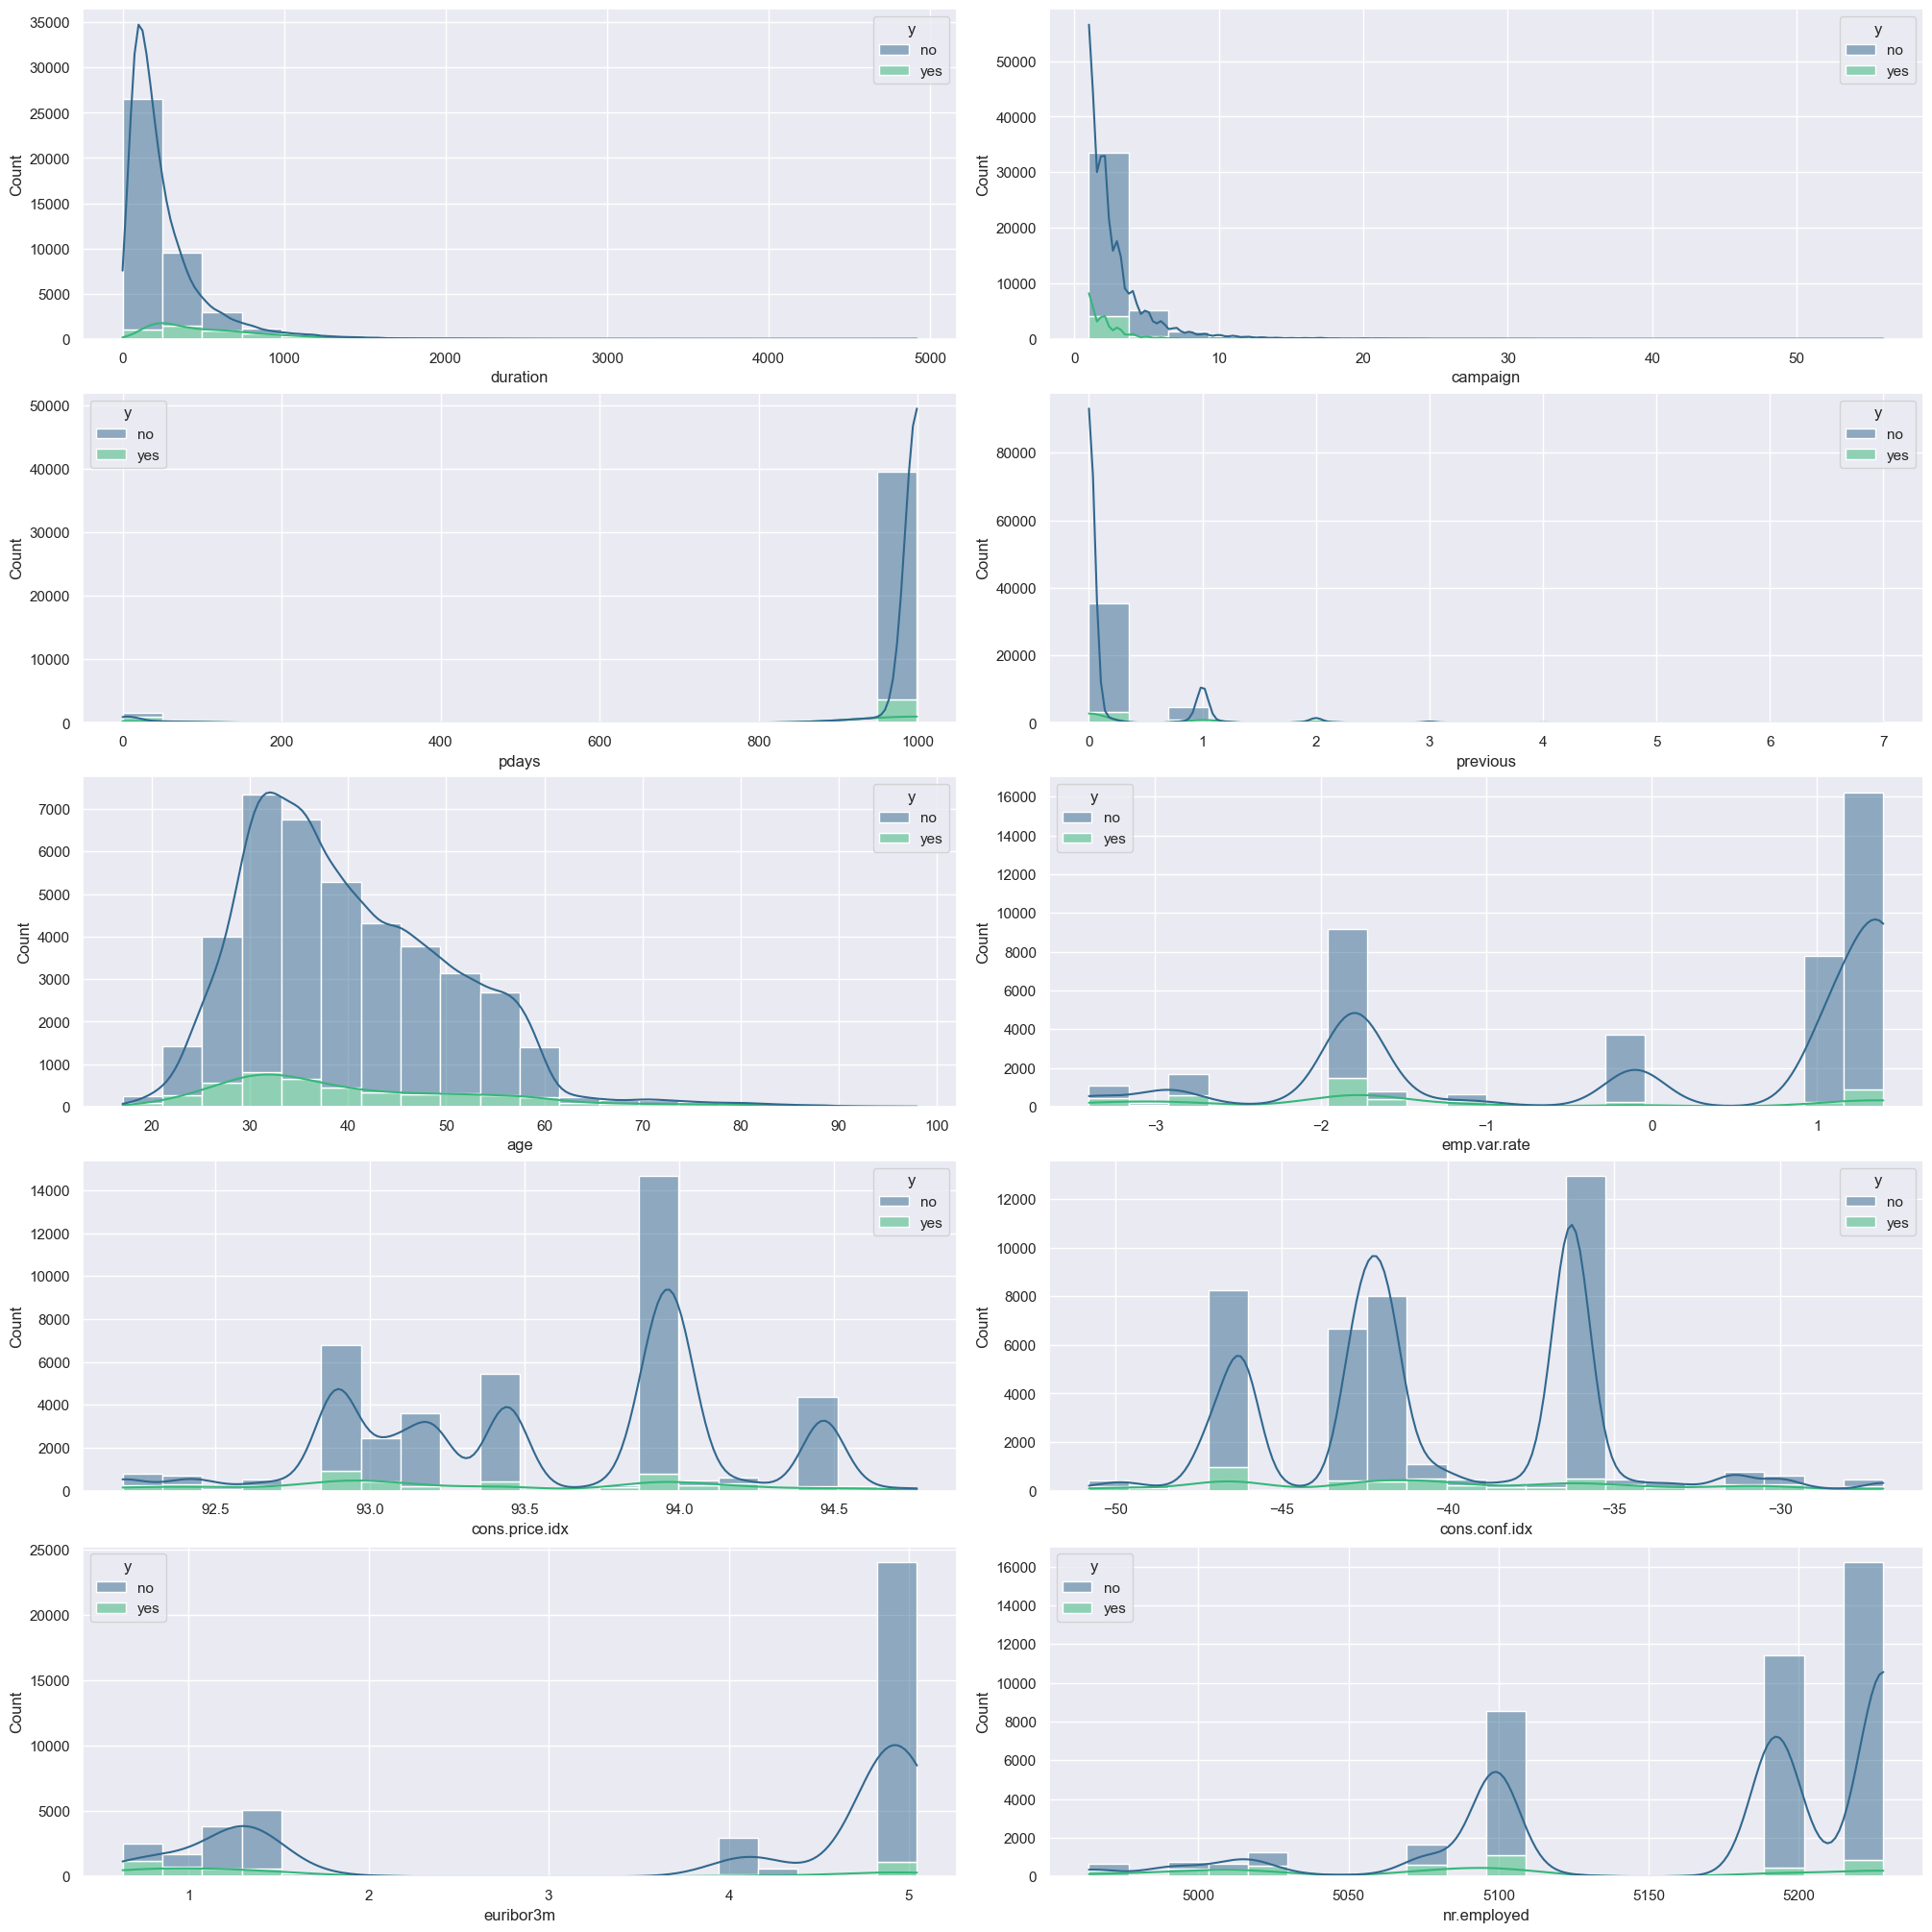

In [46]:

fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 20), constrained_layout=True)


for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))


plt.show()

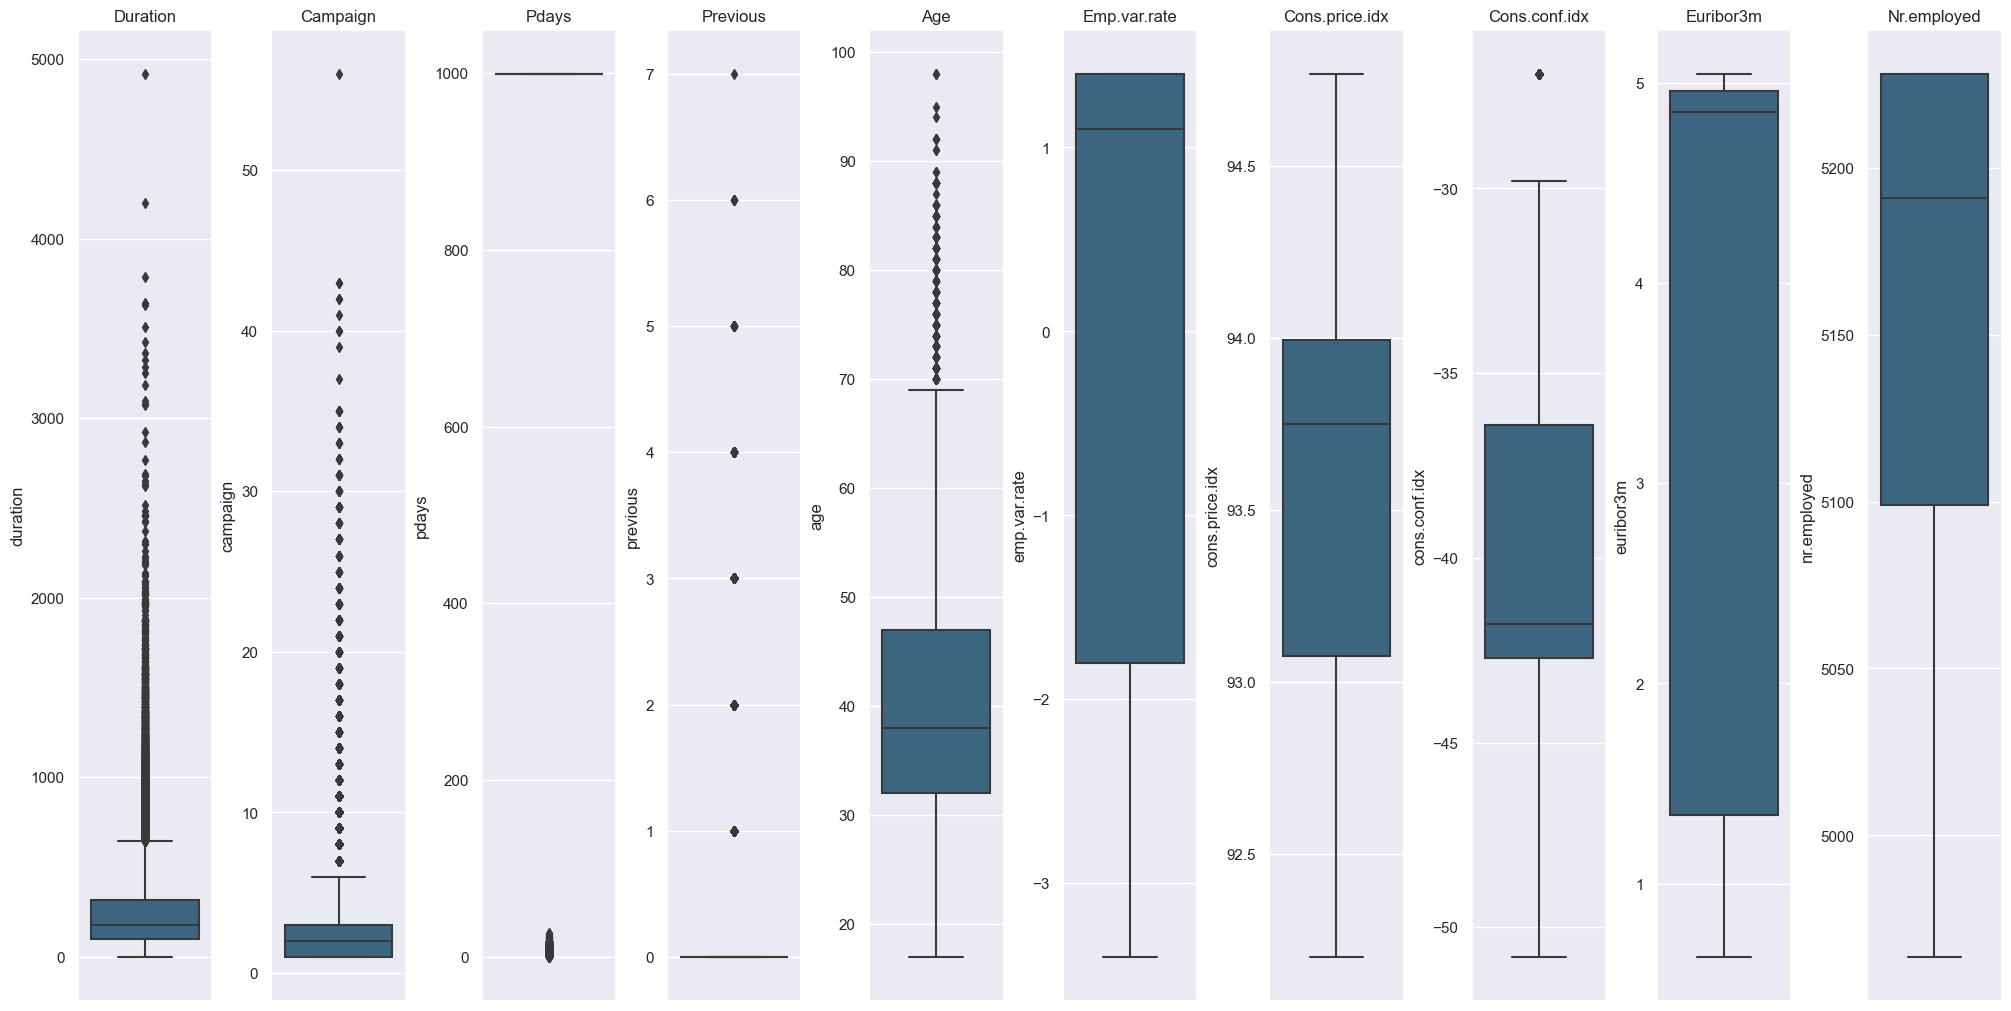

In [50]:
fig, axs = plt.subplots(1, len(numerical),
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, data=df, hue='y', ax=axs[i],
                palette=sns.color_palette("viridis", 2))
    axs[i].set_title(f.capitalize())


plt.show()

# Sta raditi sa numerickim kolonama?

1. **campaign**
    - log transform i posle eventualno IQR
2. **age**
    - IQR
3. **duration**
    - log transform pa IQR eventualno
4. **pdays**
    - diskretizuj na 0 i 1 (999 da bude 0 jer to znaci da nije kontaktiran)
5. **previous**
    - diskretizuj na 0 i 1, jer je pramalo ovih koji nisu 0
6. **cons.conf.idx**
    - IQR

-   ostalo ne diramo


## Preprocesiranje


In [52]:
# proveriti da li je ok ovo
df = df.drop(columns=['default'])
df.loc[df['housing'] == 'unknown', 'housing'] = 'yes'
df.loc[df['loan'] == 'unknown', 'loan'] = 'no'

In [53]:
df.loc[df['job'] == 'unknown', 'job'] = 'admin.'
df.loc[df['education'] == 'illiterate', 'education'] = 'basic.4y'
df.loc[df['month'] == 'sep', 'month'] = 'nov'
df.loc[df['month'] == 'oct', 'month'] = 'nov'
df.loc[df['month'] == 'dec', 'month'] = 'nov'
df.loc[df['month'] == 'mar', 'month'] = 'apr'

In [55]:
# default, housing, loan, ne odmah
labels = ['contact', 'y', 'housing', 'month', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,1,4,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,1,4,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1,0,1,4,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,1,4,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,1,1,4,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:

def remove_outliers_standard_deviation(df, features, n) -> pd.DataFrame:
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3

        outlier_list_column = df[(
            df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_list.extend(outlier_list_column)

    return outlier_list

In [57]:
def remove_outliers_iqr(df, features) -> pd.DataFrame:

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(
            df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_column)

    return outlier_list

In [58]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [59]:
for column in ['campaign', 'duration']:
    log_transform(df, column)

In [60]:
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df['previous'] = df['previous'].apply(lambda x: 0 if x < 0.5 else 1)

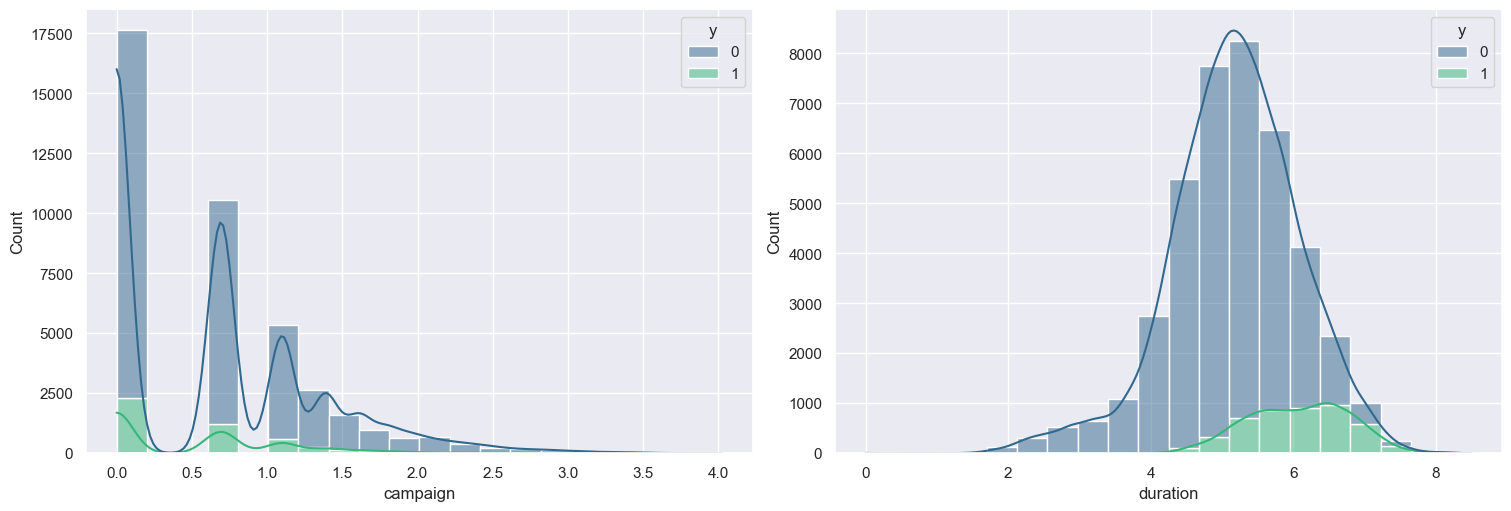

In [61]:
fig, axs = plt.subplots(1, 2,
                        figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration']):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i], bins=20, palette='viridis', kde=True)
plt.show()

In [62]:
print(f"Pre izbacivanja: {df.shape}")
outliers = remove_outliers_iqr(  # proveriti
    df, ['previous', 'campaign', 'duration', 'pdays'])
df = df.drop(outliers, axis=0).reset_index(drop=True)
print(f"Nakon izbacivanja: {df.shape}")
print(f"Outliers: {len(outliers)}")
# da li izbaciti previous i pdays?

Pre izbacivanja: (41164, 20)
Nakon izbacivanja: (34379, 20)
Outliers: 8480


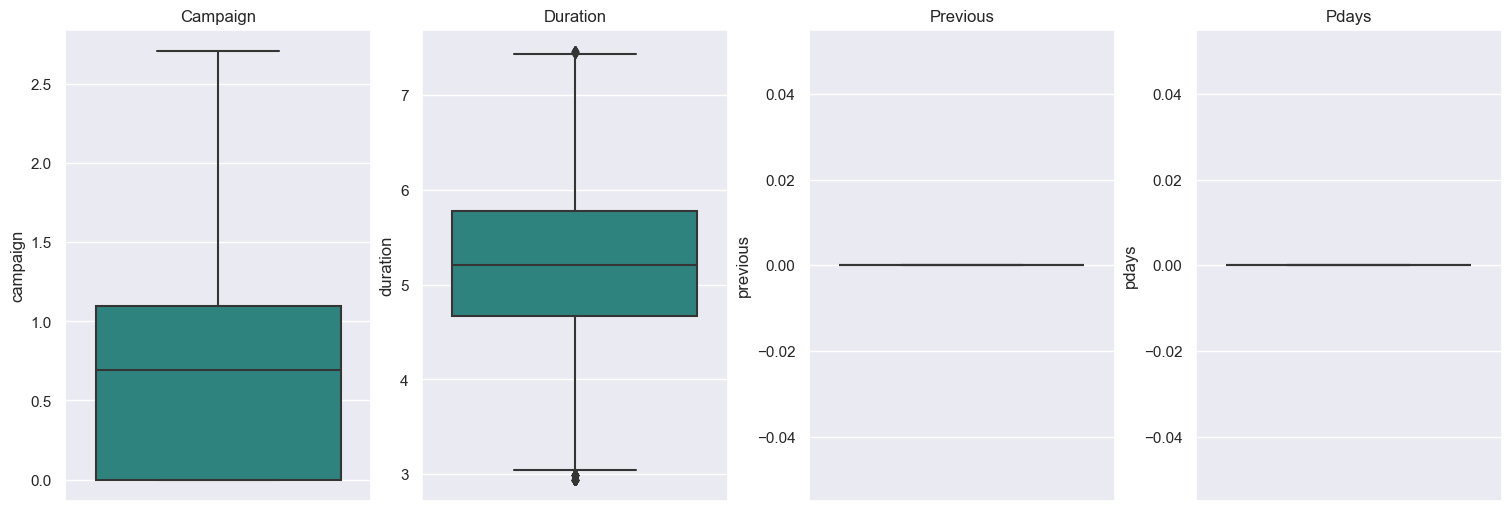

In [66]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration', 'previous', 'pdays']):
    sns.boxplot(y=f, data=df, hue='y', ax=axs[i], palette='viridis')
    axs[i].set_title(f.capitalize())
plt.show()

In [67]:
df = df.drop(columns=['pdays'])
df = df.drop(columns=['previous'])

In [68]:
# pametniji nacin za age
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(18.0, 31.0), (31.0, 36.0), (36.0, 41.0), (41.0, 49.0), (49.0, 98.0)]


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.0,housemaid,married,basic.4y,0,0,1,4,mon,5.568345,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,4.0,services,married,high.school,0,0,1,4,mon,5.010635,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2.0,services,married,high.school,1,0,1,4,mon,5.424950,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,2.0,admin.,married,basic.6y,0,0,1,4,mon,5.023881,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4.0,services,married,high.school,0,1,1,4,mon,5.730100,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [69]:
df.describe()

,age,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000
mean,2.071090,0.543093,0.151284,0.407778,2.842026,5.220543,0.637598,0.379022,93.642269,-40.273853,3.964832,5181.436775,0.089444
std,1.405095,0.498147,0.358331,0.491429,1.470847,0.824364,0.655728,1.449665,0.546191,4.318528,1.569506,62.108226,0.285388
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.944439,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,4.672829,0.000000,-0.100000,93.200000,-42.700000,4.021000,5191.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,3.000000,5.204007,0.693147,1.100000,93.918000,-41.800000,4.859000,5195.800000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,4.000000,5.777652,1.098612,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.000000
max,4.000000,1.000000,1.000000,1.000000,5.000000,7.462215,2.708050,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: >

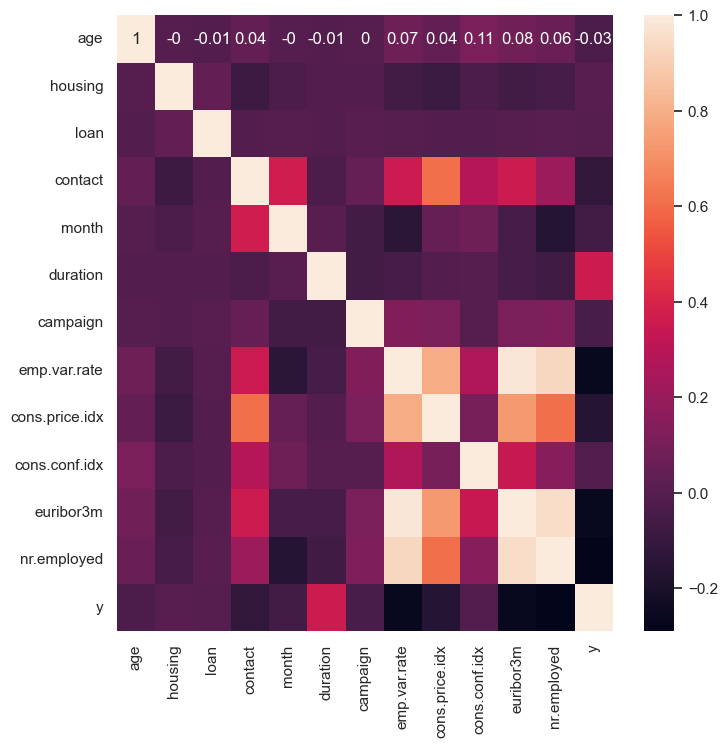

In [70]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, ax=ax)

In [71]:
one_hot_cols = ['job', 'contact', 'marital',
                'education', 'month', 'day_of_week', 'poutcome', 'age']  # probaj i age bez one hot
df = pd.get_dummies(data=df, columns=one_hot_cols).astype('float64')
df.head()

,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
0,0.0,0.0,5.568345,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,5.010635,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,5.424950,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,5.023881,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,5.730100,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [72]:
df.dtypes

housing                          float64
loan                             float64
duration                         float64
campaign                         float64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                float64
job_admin.                       float64
job_blue-collar                  float64
job_entrepreneur                 float64
job_housemaid                    float64
job_management                   float64
job_retired                      float64
job_self-employed                float64
job_services                     float64
job_student                      float64
job_technician                   float64
job_unemployed                   float64
contact_0                        float64
contact_1                        float64
marital_divorced                 float64
marital_married 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34379 entries, 0 to 34378
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   housing                        34379 non-null  float64
 1   loan                           34379 non-null  float64
 2   duration                       34379 non-null  float64
 3   campaign                       34379 non-null  float64
 4   emp.var.rate                   34379 non-null  float64
 5   cons.price.idx                 34379 non-null  float64
 6   cons.conf.idx                  34379 non-null  float64
 7   euribor3m                      34379 non-null  float64
 8   nr.employed                    34379 non-null  float64
 9   y                              34379 non-null  float64
 10  job_admin.                     34379 non-null  float64
 11  job_blue-collar                34379 non-null  float64
 12  job_entrepreneur               34379 non-null 

In [74]:
# probaj i norm i std
scaler = Normalizer()
cols_to_scale = ['duration',
                 'campaign', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
0,0.0,0.0,0.055156,0.0,0.010896,0.931042,-0.360554,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.049646,0.0,0.010899,0.931312,-0.360659,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.053740,0.0,0.010897,0.931114,-0.360582,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.049777,0.0,0.010899,0.931306,-0.360656,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.056753,0.0,0.010895,0.930959,-0.360522,4.857,5191.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

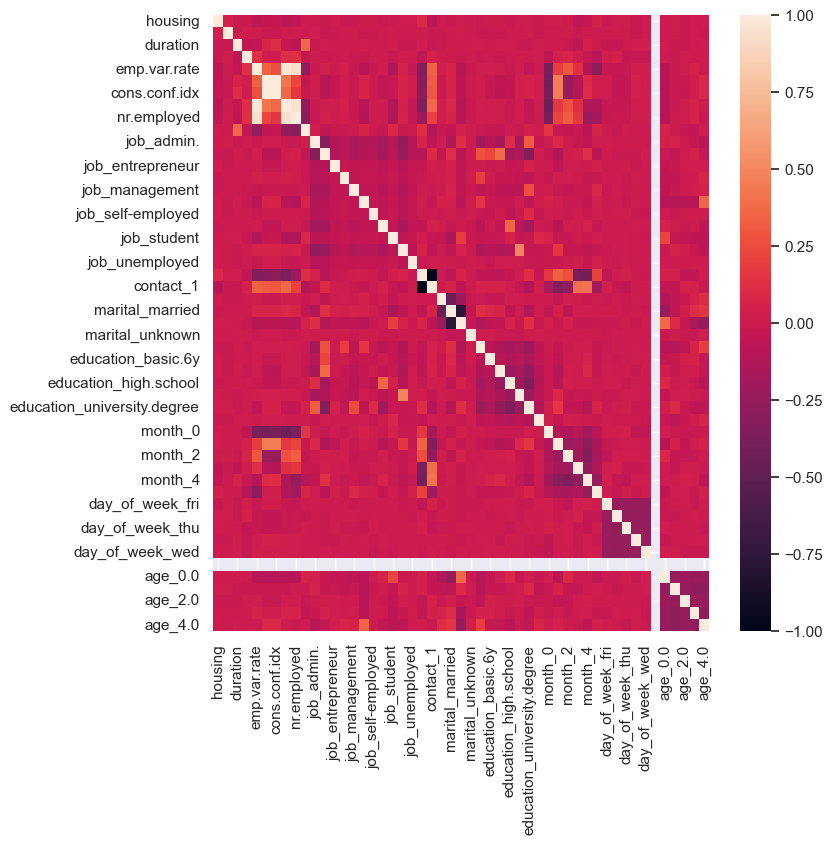

In [76]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


In [90]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm", "F1", "AUC", "Accuracy"])

<Axes: xlabel='y', ylabel='count'>

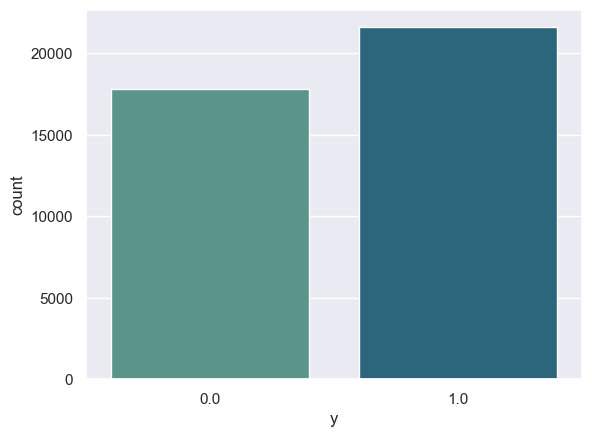

In [92]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [106]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):
    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        row = {'Algorithm': name, 'F1': f1, 'AUC': roc_auc, 'Accuracy': acc}
        results = pd.concat([pd.DataFrame([row]), results], ignore_index=True)

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False,)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

Random Forest:DONE; AdaBoost:DONE; Bagging:DONE; Logistic Regression:DONE; Ridge:DONE; 

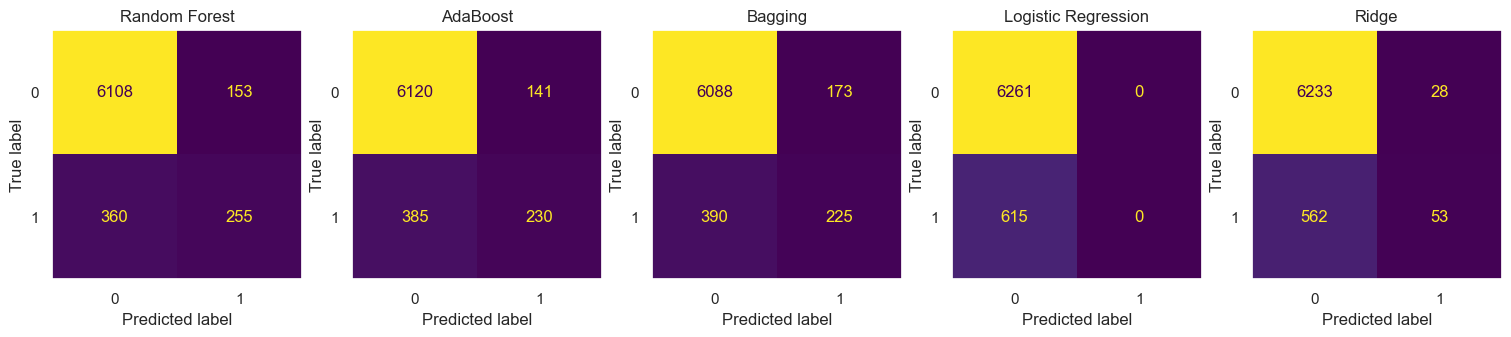

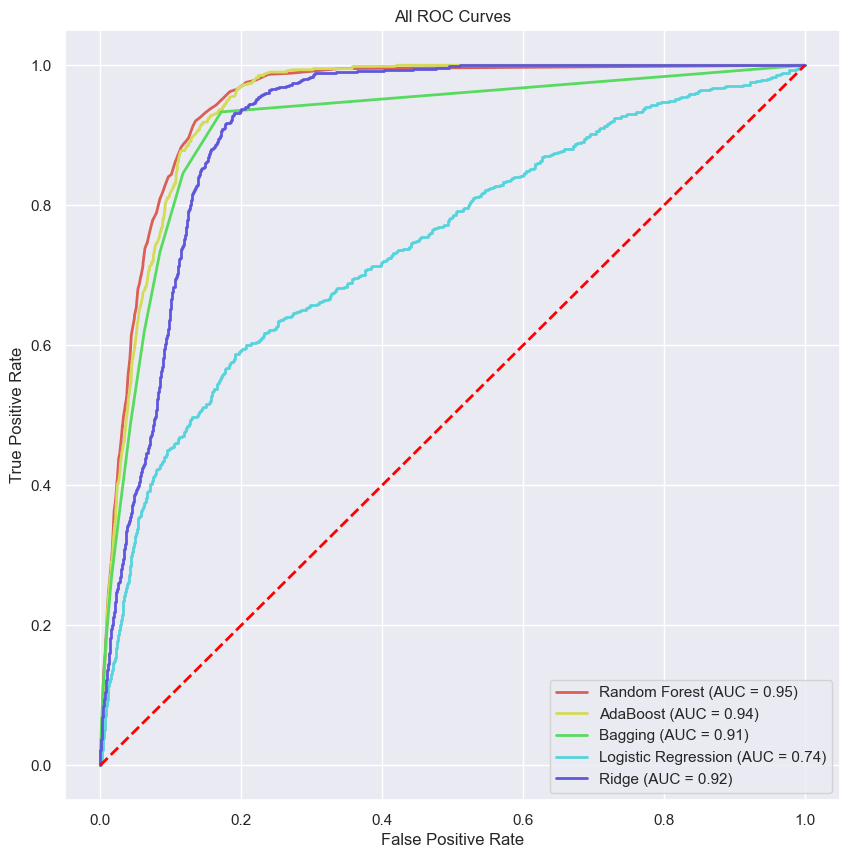

In [107]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Ridge': RidgeClassifier(),
}
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)


Random Forest (balanced):DONE; AdaBoost (balanced):DONE; Bagging (balanced):DONE; Logistic Regression (balanced):DONE; Ridge (balanced):DONE; 

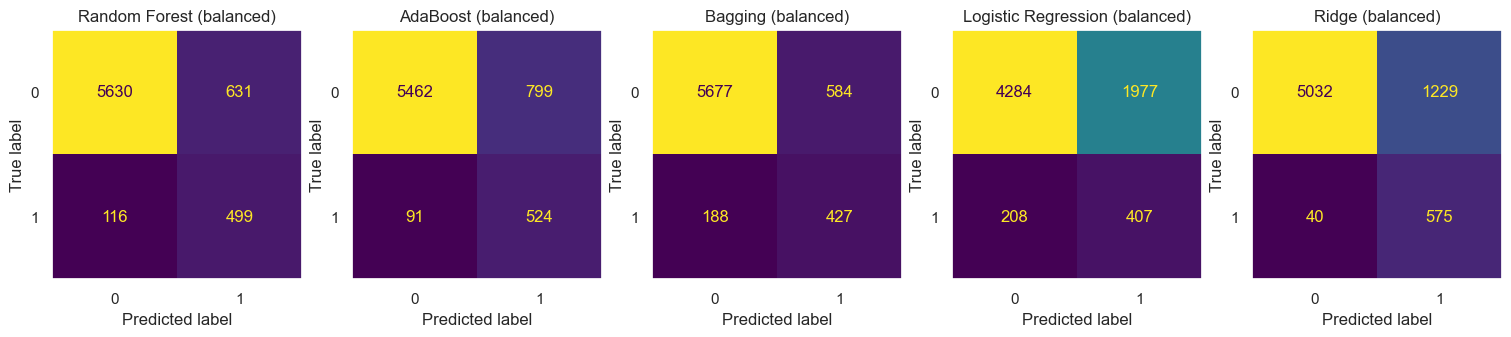

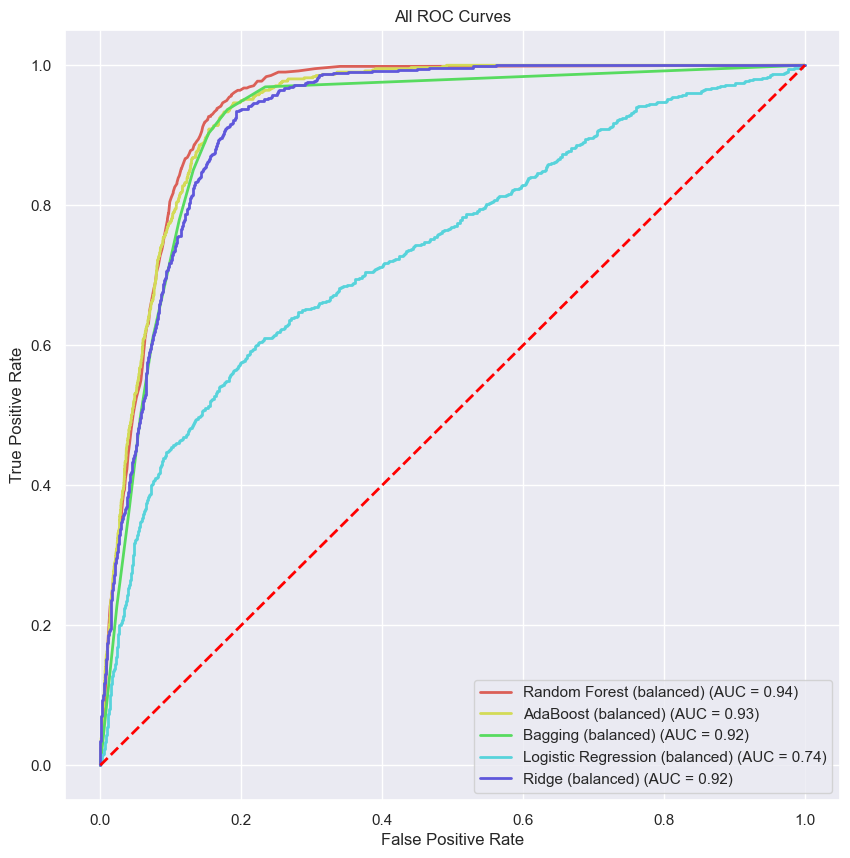

In [108]:
classifiers_balanced = {
    'Random Forest (balanced)': RandomForestClassifier(),
    'AdaBoost (balanced)': AdaBoostClassifier(),
    'Bagging (balanced)': BaggingClassifier(),
    'Logistic Regression (balanced)': LogisticRegression(),
    'Ridge (balanced)': RidgeClassifier(),
}
results = test_models(classifiers_balanced, X_resampled,
                      X_test, y_resampled, y_test, results)

In [99]:
results.sort_values(by='F1', ascending=False)

,Algorithm,F1,AUC,Accuracy
4,Random Forest (balanced),0.570104,0.936300,0.892088
3,AdaBoost (balanced),0.540764,0.933344,0.870564
2,Bagging (balanced),0.531136,0.915927,0.888307
9,Random Forest,0.519807,0.946566,0.927720
0,Ridge (balanced),0.475403,0.923193,0.815445
8,AdaBoost,0.466531,0.944224,0.923502
7,Bagging,0.436075,0.916832,0.917248
1,Logistic Regression (balanced),0.271424,0.737593,0.682228
5,Ridge,0.152299,0.915838,0.914194
6,Logistic Regression,0.000000,0.743755,0.910558
